<a href="https://colab.research.google.com/github/xavierlmendez/botMaker/blob/main/MLFall25HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xavier Mendez HW 1 Q4 and Q5 (starts at cell 28)
## Q4 Implementing a linear regression model from scratch (without polynomial features)

### Q4 notes:
- since it does not have polynomial feature I can use a simple function of one weight per feature
- The core idea behind gradient descent is centered around the error of a predicted and actual value, the direction we need to move towards in the vector space to reduce that error, and quantifying how much we move by using the loss function and the learning rate though were not using learning rate here

preliminary psuedo/word code:
- assuming a function of y = \[W0X0, ..., WiXi] + b for i number of features in the data set  
- iterate over each element in the data set
- with each element calculate the loss (I'll want to make this a plug in able thing so my loss functions need to respect the open/closed principle)
- then still with each element update the weights







In [2]:
import numpy as np
import pandas as pd

In [157]:
# going with a reusable oop structure so ill be making the hypothesis function from scratch with its own class
# I'll be using numpy for my matrix manipulation / lin algebra
class HypothesisFunction:
    def __init__(self, initialWeights, initialBias):
        # the X in the normal hypothesis function will be passed into the compute prediction function instead of a part of instantiation
        self.hypothesis = initialWeights
        self.bias = initialBias
        self.metadata = {
            "name": "hypothesis function parent class",
            "description": "A library class serving as a template for hypothesis function classes used to compute a prediction and expand/contract the hypothesis space the hypothesis in this context is a nparray containing the weight and degree of the hypothesis space"
        }

    def setHypothesis(self, hypothesis):
        self.hypothesis = hypothesis

    def getHypothesis(self):
        return self.hypothesis

    def updateBias(self, bias):
        self.bias = bias

    def getBias(self):
        return self.bias

    def printHypothesis(self):
        print(self.hypothesis)

    def computePrediction(self, data):
        # for hw one keeping it simple and non polynomial
        # multiplying the weights by the data and adding the bias
        data = data.reshape(-1)
        return self.hypothesis @ data + self.bias

    def computeClassification(self, data):
        # for hw one keeping it simple and non polynomial
        # multiplying the weights by the data and adding the bias
        data = data.reshape(-1)
        return np.sign(self.hypothesis @ data + self.bias)

    def expandHypothesis(self, degree):
        # if the hypothesis is [[x1], [x2]] and degree=3 then we will return [[1, x1, x1^2, x1^3], [1, x2, x2^2, x2^3]]
        # not using for HW1
        pass

    def getWeights(self):
        return self.hypothesis

    def updateWeights(self, newWeights):
        self.hypothesis = newWeights


In [4]:
# defining the loss functions ill be plugging into the linear regression model, I want this to be abstract for reuse with the project if I decide to make a library
# https://docs.python.org/3/tutorial/classes.html
class LossFunction:
    def __init__(self):
      # the hypothesisFunction I am expecting to be a data object representing the vector notation used for hypothesisspaces so I can exapand this to polynomial
      # later I want the hypothesis function to have an enum so that I can dictate if it is meant to be for regression or classification
        self.metadata = {
            "name": "loss function parent class",
            "description": "A library class serving as a template for loss function classes that compute loss between a single predicted and actual value"
        }

    def computeLoss(self, actual, predicted):
        pass
    def computeGradient(self, actual, predicted):
        pass

class MSE(LossFunction):
    def computeLoss(self, actual, predicted):
        return np.mean((actual - predicted)**2)

    def computeGradient(self, actual, predicted):
        n = actual.shape[0]
        return (2.0/ n) * (predicted - actual)

class MAE(LossFunction):
    def computeLoss(self, actual, predicted):
        return np.mean(abs(actual - predicted))

    def computeGradient(self, actual, predicted):
        return np.sign(predicted - actual)

In [5]:
class CostFunction():
  def __init__(self, lossFunction : LossFunction):
    self.lossFunction = lossFunction
    # the hypothesisFunction I am expecting to be a data object representing the vector notation used for hypothesisspaces so I can exapand this to polynomial
    # later I want the hypothesis function to have an enum so that I can dictate if it is meant to be for regression or classification
    self.metadata = {
        "name": "loss function parent class",
        "description": "A library class serving as a template for cost function classes that compute cost for a run through of a data set"
    }

  def computeCost(self, hypothesisFunction, dataValues, dataTargets):
    pass

In [6]:
class MyLinearRegression:
    # choosing 0.001 for default learning rate bc thats what adam uses
    def __init__(self, hypothesisFunction : HypothesisFunction, lossFunction : LossFunction, learningRate = 0.001, epochs = 10):
        self.learningModel = hypothesisFunction
        self.lossFunction = lossFunction
        self.learningRate = learningRate
        self.epochs = epochs

    def fit(self, dataValues, dataTargets):
        # for n epochs
        # calculate the cost function - in the gradientDescent function
        # compute the gradient
        # update the weights
        # repeat
        for epoch in range(self.epochs):
            newWeights, newBias = self.calculateGradientDescent(dataValues, dataTargets)
            self.updateWeights(newWeights, newBias)
            cost = self.calculateCostFunction(dataValues, dataTargets)
            print(f"Epoch: {epoch}, Cost: {cost}")
        return self

    def predict(self, data):
        return self.learningModel.computePrediction(data)

    def predictValues(self, dataValues):
      predictedValues = []
      for data in dataValues:
        predictedValues.append(self.predict(data))
      return np.array(predictedValues)

    def evaluate(self, dataValues, dataTargets):
        # used same evaluate function as boston data set demo
        pass

    def calculateGradientDescent(self, dataValues, dataTargets):
        # calculate the gradient
        predicted = self.predictValues(dataValues)
        gradientDescentAdjusteddataTargets = self.lossFunction.computeGradient(dataTargets, predicted)

        gradientDescentAdjustedWeights = dataValues.T @ gradientDescentAdjusteddataTargets
        adjustedBias = np.sum(gradientDescentAdjusteddataTargets)
        return gradientDescentAdjustedWeights, adjustedBias

    def updateWeights(self, gradientDescentAdjustedWeights, gradientDescentAdjustedBias):
        # update the weights and bias
        newWeights = self.learningModel.getWeights() - self.learningRate * gradientDescentAdjustedWeights
        newBias = self.learningModel.getBias() - self.learningRate * gradientDescentAdjustedBias
        self.learningModel.updateWeights(newWeights)
        self.learningModel.updateBias(newBias)

    def calculateCostFunction(self, dataValues, dataTargets):
        # here were putting together the cost function as a set of linear equations
        # doing it this way to leverage linear algebra packages
        predicted = self.predictValues(dataValues)
        lossAcrossData = self.lossFunction.computeLoss(dataTargets, predicted)
        return np.mean(lossAcrossData)

# Q4 test with the housing dataset
# housing set taken from https://colab.research.google.com/drive/1myH2V4xbKXZzdF-49ma_vWHLfArTyO2W#scrollTo=XNZTEWOGTdqZ


In [7]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
class BostonHousingDataset:
    def __init__(self):
        self.url = "http://lib.stat.cmu.edu/datasets/boston"
        self.feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

    def load_dataset(self):
        # Fetch data from URL
        raw_df = pd.read_csv(self.url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

        # Create the dictionary in sklearn format
        dataset = {
            'data': [],
            'target': [],
            'feature_names': self.feature_names,
            'DESCR': 'Boston House Prices dataset'
        }

        dataset['data'] = data
        dataset['target'] = target

        return dataset

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2325054334.py:8: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(self.url, sep="\s+", skiprows=22, header=None)


In [9]:
boston_housing = BostonHousingDataset()
boston_dataset = boston_housing.load_dataset()
boston_dataset.keys(), boston_dataset['DESCR']
boston = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
boston['MEDV'] = boston_dataset['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# the boston housing demo had an RMSE of 4.568 and an R2 score of 0.733449 using the sklearn.linear_model library


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

X = boston.to_numpy()
X = np.delete(X, 13, 1)
y = boston['MEDV'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Let us now evaluate on the test set
y_pred_test = lin_model.predict(X_test)
rmse_test = rmse(y_pred_test, y_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))

Test RMSE = 4.568292042303212
Test R2 = 0.7334492147453071


# Testing my implementation of linear regression

In [11]:
seededRand = np.random.default_rng(10) # seeting a seed for random initial weights after a few tests
initialWeights = seededRand.random(13)
initialBias = 0
hypothesisFunction = HypothesisFunction(initialWeights, initialBias)

In [12]:
lossFunction = MSE()
MSEBasedModel = MyLinearRegression(hypothesisFunction, lossFunction, 0.0000032, 15)
MSEBasedModel.fit(X_train, y_train)

preditctedMSETest = MSEBasedModel.predictValues(X_test)
rmse_test = rmse(preditctedMSETest, y_test)
r2_test = r2_score(y_test, preditctedMSETest)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))

Epoch: 0, Cost: 362191.290396663
Epoch: 1, Cost: 358252.9200376759
Epoch: 2, Cost: 354586.66584129696
Epoch: 3, Cost: 351125.0294482009
Epoch: 4, Cost: 347818.88413658016
Epoch: 5, Cost: 344632.4592733984
Epoch: 6, Cost: 341539.6941643463
Epoch: 7, Cost: 338521.5874135391
Epoch: 8, Cost: 335564.269987473
Epoch: 9, Cost: 332657.604389205
Epoch: 10, Cost: 329794.16629813454
Epoch: 11, Cost: 326968.50425025
Epoch: 12, Cost: 324176.6014450776
Epoch: 13, Cost: 321415.48449239996
Epoch: 14, Cost: 318682.93897959817
Test RMSE = 567.500973451071
Test R2 = -4112.442855711668


# testing MSE with different learning rates and epoch

learning rates greater than 0.0000032 were causing divergence

learning rate of 0.0000032 with 10000 epoc resulted in:

- Epoch: 9994, Cost: 41.86905593178195
- Epoch: 9995, Cost: 41.86866453302574
- Epoch: 9996, Cost: 41.868273238307
- Epoch: 9997, Cost: 41.86788204757667
- Epoch: 9998, Cost: 41.86749096078577
- Epoch: 9999, Cost: 41.867099977885324

With final RMSE and R2 as
- Test RMSE = 6.519066163975588
- Test R2 = 0.4571960186208912

bumping up to 10k epochs started to show a little overfitting
- Epoch: 99995, Cost: 34.54026778831328
- Epoch: 99996, Cost: 34.5401858536382
- Epoch: 99997, Cost: 34.54010391969166
- Epoch: 99998, Cost: 34.54002198647363
- Epoch: 99999, Cost: 34.53994005398413

With final RMSE and R2 as
Test RMSE = 6.048356456432215
Test R2 = 0.5327524820339438

after running multiple test it starting to show that having the rand function to set the initial weights is causing alot of varience in the results so I am adjusting it to use a seed

with seed, 3000 epoc and 0.0000032 learning rate
 - Epoch: 2999, Cost: 77.93920862114032
- Test RMSE = 8.379106356504652
- Test R2 = 0.10325770720637828


with seed, 30k epoc adn 0.0000032 learning rate
- Epoch: 29999, Cost: 43.098175798092946
- Test RMSE = 6.826398571036534
- Test R2 = 0.4048101310893092

with seed, 90k epoc and same l rate
- Epoch: 89999, Cost: 35.77096457525381
- Test RMSE = 6.1718540196283795
- Test R2 = 0.5134768191945369

with seed, 150k epoc and same l rate
- Epoch: 149999, Cost: 31.485463229998693
- Test RMSE = 5.737316089649038
- Test R2 = 0.5795737717745555


In [13]:
# now looking at MAE
lossFunction = MAE()
MAEBasedModel = MyLinearRegression(hypothesisFunction, lossFunction, 0.00000003, 15)
MAEBasedModel.fit(X_train, y_train)

preditctedMAETest = MAEBasedModel.predictValues(X_test)
rmse_test = rmse(preditctedMAETest, y_test)
r2_test = r2_score(y_test, preditctedMAETest)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))

Epoch: 0, Cost: 548.2660735917243
Epoch: 1, Cost: 544.6499493892943
Epoch: 2, Cost: 541.0338251868644
Epoch: 3, Cost: 537.4177009844343
Epoch: 4, Cost: 533.8015767820044
Epoch: 5, Cost: 530.1854525795744
Epoch: 6, Cost: 526.5693283771445
Epoch: 7, Cost: 522.9532041747145
Epoch: 8, Cost: 519.3370799722846
Epoch: 9, Cost: 515.7209557698548
Epoch: 10, Cost: 512.1048315674246
Epoch: 11, Cost: 508.4887073649947
Epoch: 12, Cost: 504.8725831625647
Epoch: 13, Cost: 501.2564589601348
Epoch: 14, Cost: 497.64033475770486
Test RMSE = 511.66938850655237
Test R2 = -3342.8833393622017


# testing MSA with different learning rates and epoch

with mse learning rates greater than 0.00000003 was causing the cost to diverge/ocilate

with 0.00000003 lr and 150k epocs
- Epoch: 149999, Cost: 4.360151055108094
- Test RMSE = 6.387948098132453
- Test R2 = 0.4788112839521784

# comparison

my solutions did not beat the Test RMSE = 4.568292042303212 and
Test R2 = 0.7334492147453071 of the sklearn implementation

with the MSE loss function performing better than the MAE at
- Test RMSE = 5.737316089649038
- Test R2 = 0.5795737717745555

and MAE performing the worst at
- Test RMSE = 6.387948098132453
- Test R2 = 0.4788112839521784

I believe this may be due to how I am handling the math in my classes and the percision of the variable being through around as well as the learning rate implementation with in sklearn being better

# Q5

In [305]:
class PerceptronLoss(LossFunction):
    def computeLoss(self, actual: np.ndarray, predicted: np.ndarray):
        return np.maximum(0.0, -actual * predicted)

    def computeGradient(self, actual, predicted, dataValues):
      # this is actually a sub gradient but reusing the function name for consistency
      zeroIfClassifiedCorrectly = (actual * predicted <= 0)
      return dataValues.T @ (zeroIfClassifiedCorrectly * actual)

    def computeBias(self, actual, predicted):
      zeroIfClassifiedCorrectly = (actual * predicted <= 0)
      return (zeroIfClassifiedCorrectly * actual).sum()

class HingeLoss(LossFunction):
    def computeLoss(self, actual, predicted):
        return np.maximum(0.0, 1.0 - actual * predicted)

    def computeGradient(self, actual, predicted, dataValues):
      # this is actually a sub gradient but reusing the function name for consistency
      zeroIfClassifiedCorrectly = (actual * predicted <= 0)
      return dataValues.T @ (zeroIfClassifiedCorrectly * -actual)

    def computeBias(self, actual, predicted):
      zeroIfClassifiedCorrectly = (actual * predicted <= 0)
      return (zeroIfClassifiedCorrectly * actual).sum()

In [287]:
class MyPerceptron:
    def __init__(self, hypothesisFunction : HypothesisFunction, lossFunction : LossFunction, learningRate = 0.001, epochs = 10):
        self.learningModel = hypothesisFunction
        self.lossFunction = lossFunction
        self.learningRate = learningRate
        self.epochs = epochs

    def fit(self, dataValues, dataTargets):
        for epoch in range(self.epochs):
            subGradientDirectionMatrix, subGradientDiasDirectionMatrix = self.calculateSubGradientDescent(dataValues, dataTargets)
            self.updateWeights(subGradientDirectionMatrix, subGradientDiasDirectionMatrix)
            error = self.calculateError(dataValues, dataTargets)
            print(f"Epoch: {epoch}, Error: {error}")
        return self

    def predict(self, data):
        return np.sign(self.learningModel.computeClassification(data))

    def predictValues(self, dataValues):
      predictedValues = []
      for data in dataValues:
        predictedValues.append(self.predict(data))
      return np.array(predictedValues)

    def evaluate(self, dataValues, dataTargets):
        pass

    def calculateSubGradientDescent(self, dataValues, dataTargets):
        # calculate the gradient
        predicted = self.predictValues(dataValues)
        subGradientDirection = self.lossFunction.computeGradient(dataTargets, predicted, dataValues)
        subGradientBiasDirection = self.lossFunction.computeBias(dataTargets, predicted)
        return subGradientDirection, subGradientBiasDirection

    def updateWeights(self, subGradientDirection, subGradientBiasDirection):
        # update the weights and bias
        print('sub gradient:', subGradientDirection)
        newWeights = self.learningModel.getWeights() + self.learningRate * subGradientDirection
        print('updated weights:', newWeights)
        newBias = self.learningModel.getBias() + self.learningRate * subGradientBiasDirection
        self.learningModel.updateWeights(newWeights)
        self.learningModel.updateBias(newBias)

    def calculateError(self, dataValues, dataTargets):
        predicted = self.predictValues(dataValues)
        misclassified = predicted != dataTargets
        return np.mean(misclassified)

In [288]:

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [289]:
initialWeights = np.array([-0.1, 0.1]) # using a y = mx +b with one weight for a linear function doing this after reviewing the output of the above cell
initialBias = -1
hypothesisFunction = HypothesisFunction(initialWeights, initialBias)
lossFunction = PerceptronLoss()
perceptronModel = MyPerceptron(hypothesisFunction, lossFunction, .01, 10)
y_mapped = np.where(y == 0, -1, 1) # expecting y classification to be -1 and 1 for our purposes
perceptronModel.fit(X, y_mapped)
print('predicted values', perceptronModel.predictValues(X))
print('actual values', y_mapped)


sub gradient: [50.45477971 24.20078543]
updated weights: [0.4045478  0.34200785]
Epoch: 0, Error: 0.52
sub gradient: [ -22.99239066 -107.24624354]
updated weights: [ 0.17462389 -0.73045458]
Epoch: 1, Error: 0.5
sub gradient: [50.45477971 24.20078543]
updated weights: [ 0.67917169 -0.48844673]
Epoch: 2, Error: 0.14
sub gradient: [10.52493599 10.1522765 ]
updated weights: [ 0.78442105 -0.38692396]
Epoch: 3, Error: 0.08
sub gradient: [5.1391186  5.62312895]
updated weights: [ 0.83581223 -0.33069267]
Epoch: 4, Error: 0.06
sub gradient: [ 0.03200218 -0.77653322]
updated weights: [ 0.83613226 -0.338458  ]
Epoch: 5, Error: 0.06
sub gradient: [ 0.03200218 -0.77653322]
updated weights: [ 0.83645228 -0.34622334]
Epoch: 6, Error: 0.06
sub gradient: [ 0.03200218 -0.77653322]
updated weights: [ 0.8367723  -0.35398867]
Epoch: 7, Error: 0.06
sub gradient: [ 0.03200218 -0.77653322]
updated weights: [ 0.83709232 -0.361754  ]
Epoch: 8, Error: 0.06
sub gradient: [ 0.03200218 -0.77653322]
updated weights:

running the perceptron with a few different intial weights and bias as well as
changing up the learning rate and epocs resulted in converging at an error of 0.5 pretty consistently, I belive something is wrong with my implementation or computation of the error

perceptron with learning rate of 0.01, and 10 epocs
- sub gradient: 25.0
- updated weights: [0.25 0.25]
- Epoch: 0, Error: 0.78
- sub gradient: 39.0
- updated weights: [0.64 0.64]
- Epoch: 1, Error: 0.5
- sub gradient: 25.0
- updated weights: [0.89 0.89]
- Epoch: 2, Error: 0.5
- sub gradient: 25.0
- updated weights: [1.14 1.14]
- Epoch: 3, Error: 0.5

... looks like it was due to my core classification prediction function
   -  def computeClassification(self, data):
        - data = data.reshape(-1)
        - return np.sign(self.hypothesis @ data + self.bias)

        ^ before fixing it up

  plus a few other scalar versus vector multiplication...


  after fixing up my implementation im getting

- sub gradient: [50.45477971 24.20078543]
- updated weights: [0.4045478  0.34200785]
- Epoch: 0, Error: 0.52
- sub gradient: [ -22.99239066 -107.24624354]
- updated weights: [ 0.17462389 -0.73045458]
- Epoch: 1, Error: 0.5
- sub gradient: [50.45477971 24.20078543]
- updated weights: [ 0.67917169 -0.48844673]
- Epoch: 2, Error: 0.14
- sub gradient: [10.52493599 10.1522765 ]
- updated weights: [ 0.78442105 -0.38692396]
- Epoch: 3, Error: 0.08
- sub gradient: [5.1391186  5.62312895]
- updated weights: [ 0.83581223 -0.33069267]
- Epoch: 4, Error: 0.06
- sub gradient: [ 0.03200218 -0.77653322]
- updated weights: [ 0.83613226 -0.338458  ]
started converging here

# using blob data and visuals from SVM lab

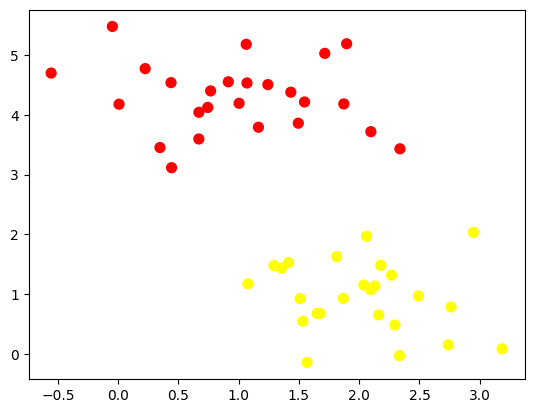

In [290]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

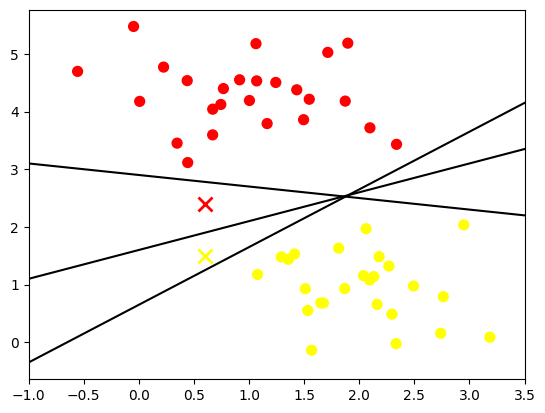

In [291]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.4], 'x', color='red', markeredgewidth=2, markersize=10)
plt.plot([0.6], [1.5], 'x', color='yellow', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);


# Hinge loss function

In [307]:
class MySVM:
    def __init__(self, hypothesisFunction : HypothesisFunction, lossFunction : LossFunction, learningRate = 0.001, epochs = 10):
        self.learningModel = hypothesisFunction
        self.lossFunction = lossFunction
        self.learningRate = learningRate
        self.epochs = epochs

    def fit(self, dataValues, dataTargets):
        for epoch in range(self.epochs):
            subGradientDirectionMatrix, subGradientDiasDirectionMatrix = self.calculateSubGradientDescent(dataValues, dataTargets)
            self.updateWeights(subGradientDirectionMatrix, subGradientDiasDirectionMatrix)
            error = self.calculateError(dataValues, dataTargets)
            print(f"Epoch: {epoch}, Error: {error}")
        return self

    def predict(self, data):
        return np.sign(self.learningModel.computeClassification(data))

    def predictValues(self, dataValues):
      predictedValues = []
      for data in dataValues:
        predictedValues.append(self.predict(data))
      return np.array(predictedValues)

    def evaluate(self, dataValues, dataTargets):
        pass

    def calculateSubGradientDescent(self, dataValues, dataTargets):
        # calculate the gradient
        predicted = self.predictValues(dataValues)
        subGradientDirection = self.lossFunction.computeGradient(dataTargets, predicted, dataValues)
        subGradientBiasDirection = self.lossFunction.computeBias(dataTargets, predicted)
        return subGradientDirection, subGradientBiasDirection

    def updateWeights(self, subGradientDirection, subGradientBiasDirection):
        # update the weights and bias
        print('sub gradient:', subGradientDirection)
        newWeights = self.learningModel.getWeights() - self.learningRate * subGradientDirection
        print('updated weights:', newWeights)
        newBias = self.learningModel.getBias() - self.learningRate * subGradientBiasDirection
        self.learningModel.updateWeights(newWeights)
        self.learningModel.updateBias(newBias)

    def calculateError(self, dataValues, dataTargets):
        predicted = self.predictValues(dataValues)
        misclassified = predicted != dataTargets
        return np.mean(misclassified)

In [315]:
initialWeights = np.array([-0.1, 0.1]) # using a y = mx +b with one weight for a linear function doing this after reviewing the output of the above cell
initialBias = -1
hypothesisFunction = HypothesisFunction(initialWeights, initialBias)
lossFunction = HingeLoss()
perceptronModel = MySVM(hypothesisFunction, lossFunction, .08, 10)
y_mapped = np.where(y == 0, -1, 1) # expecting y classification to be -1 and 1 for our purposes
perceptronModel.fit(X, y_mapped)
print('predicted values', perceptronModel.predictValues(X))
print('actual values', y_mapped)

sub gradient: [-50.45477971 -24.20078543]
updated weights: [3.93638238 2.03606283]
Epoch: 0, Error: 0.5
sub gradient: [ 24.55977041 107.10813763]
updated weights: [ 1.97160074 -6.53258818]
Epoch: 1, Error: 0.4
sub gradient: [-38.33199659 -23.63041988]
updated weights: [ 5.03816047 -4.64215459]
Epoch: 2, Error: 0.12
sub gradient: [-9.01404749 -9.2234456 ]
updated weights: [ 5.75928427 -3.90427894]
Epoch: 3, Error: 0.08
sub gradient: [-5.1391186  -5.62312895]
updated weights: [ 6.17041376 -3.45442862]
Epoch: 4, Error: 0.04
sub gradient: [-2.37012504 -2.6546347 ]
updated weights: [ 6.36002376 -3.24205785]
Epoch: 5, Error: 0.06
sub gradient: [-0.03200218  0.77653322]
updated weights: [ 6.36258394 -3.3041805 ]
Epoch: 6, Error: 0.04
sub gradient: [-2.37012504 -2.6546347 ]
updated weights: [ 6.55219394 -3.09180973]
Epoch: 7, Error: 0.04
sub gradient: [1.26097434 2.25583491]
updated weights: [ 6.45131599 -3.27227652]
Epoch: 8, Error: 0.06
sub gradient: [-0.03200218  0.77653322]
updated weights


for the hinge loss looks like the best error was at 0.04 before the weights started ocilating
```

initialWeights = np.array([-0.1, 0.1]) # using a y = mx +b with one weight for a linear function doing this after reviewing the output of the above cell
initialBias = -1
hypothesisFunction = HypothesisFunction(initialWeights, initialBias)
lossFunction = HingeLoss()
perceptronModel = MySVM(hypothesisFunction, lossFunction, .08, 10)
y_mapped = np.where(y == 0, -1, 1) # expecting y classification to be -1 and 1 for our purposes
perceptronModel.fit(X, y_mapped)
print('predicted values', perceptronMo
sub gradient: [-50.45477971 -24.20078543]
updated weights: [3.93638238 2.03606283]
Epoch: 0, Error: 0.5
sub gradient: [ 24.55977041 107.10813763]
updated weights: [ 1.97160074 -6.53258818]
Epoch: 1, Error: 0.4
sub gradient: [-38.33199659 -23.63041988]
updated weights: [ 5.03816047 -4.64215459]
Epoch: 2, Error: 0.12
sub gradient: [-9.01404749 -9.2234456 ]
updated weights: [ 5.75928427 -3.90427894]
Epoch: 3, Error: 0.08
sub gradient: [-5.1391186  -5.62312895]
updated weights: [ 6.17041376 -3.45442862]
Epoch: 4, Error: 0.04
sub gradient: [-2.37012504 -2.6546347 ]
updated weights: [ 6.36002376 -3.24205785]
Epoch: 5, Error: 0.06
sub gradient: [-0.03200218  0.77653322]
updated weights: [ 6.36258394 -3.3041805 ]
Epoch: 6, Error: 0.04
sub gradient: [-2.37012504 -2.6546347 ]
updated weights: [ 6.55219394 -3.09180973]
Epoch: 7, Error: 0.04
sub gradient: [1.26097434 2.25583491]
updated weights: [ 6.45131599 -3.27227652]
Epoch: 8, Error: 0.06
sub gradient: [-0.03200218  0.77653322]
updated weights: [ 6.45387617 -3.33439918]
Epoch: 9, Error: 0.04
predicted values [ 1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.
  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1.]
actual values [ 1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1
  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1
  1 -1]
```



# compared to the SVM demo my implementation had a close error rate with the perceptron loss being more stable, however I believe this is due to not implementing additional hyper parameters that SVMs take to handle more expansive cases in the data

In [285]:
perceptronModel.learningModel.getWeights()

array([-0.1,  0.1])